importing libraries

In [57]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')



reading data for training

In [58]:
Df = pd.read_csv("Job_Placement_Data1.csv")
df = Df.drop('gender',axis = 1)

In [59]:
df.head()

,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


#preprocessing

In [60]:
df.shape

(215, 12)

In [61]:
df.isnull().sum()

ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   ssc_board            215 non-null    object 
 2   hsc_percentage       215 non-null    float64
 3   hsc_board            215 non-null    object 
 4   hsc_subject          215 non-null    object 
 5   degree_percentage    215 non-null    float64
 6   undergrad_degree     215 non-null    object 
 7   work_experience      215 non-null    object 
 8   emp_test_percentage  215 non-null    float64
 9   specialisation       215 non-null    object 
 10  mba_percent          215 non-null    float64
 11  status               215 non-null    object 
dtypes: float64(5), object(7)
memory usage: 20.3+ KB


In [64]:
df["status"]

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [65]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


EDA(Exploratory Data Analysis)

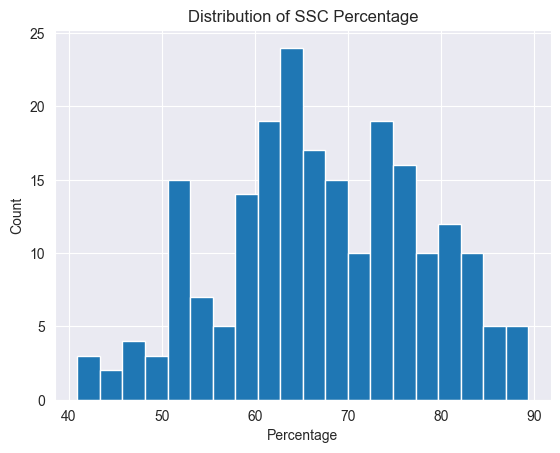

In [66]:
#Distribution of SSC Percentage
plt.hist(df["ssc_percentage"],bins = 20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('Count') 
plt.show()

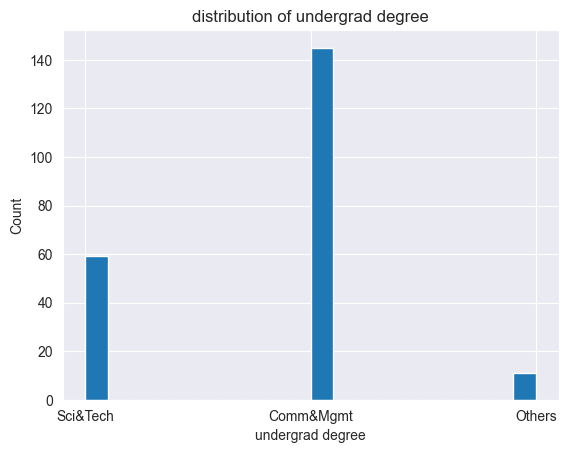

In [67]:
#Distribution of Male & Female
plt.hist(df["undergrad_degree"],bins = 20)
plt.title("distribution of undergrad degree")
plt.xlabel('undergrad degree')
plt.ylabel('Count') 
plt.show()

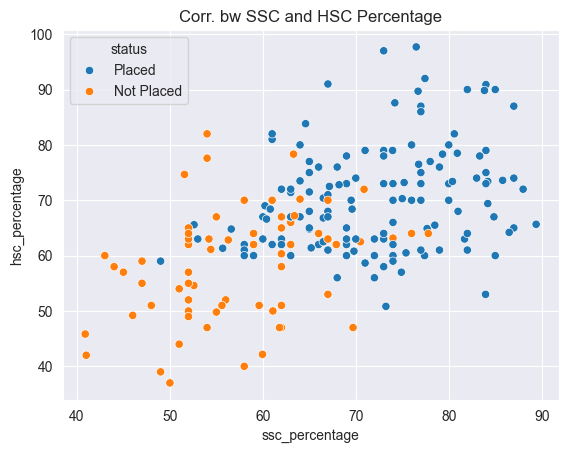

In [68]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Corr. bw SSC and HSC Percentage")
plt.show()

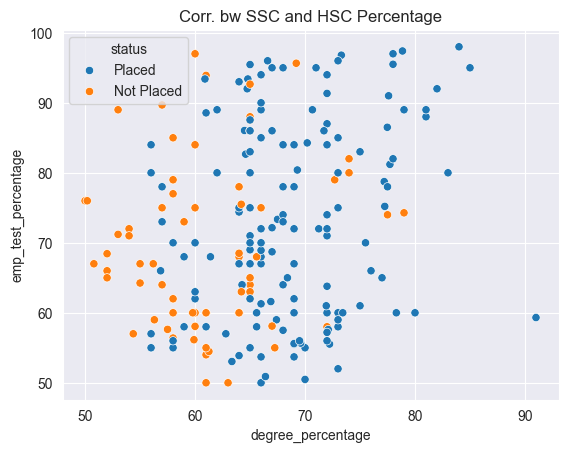

In [69]:
sns.scatterplot(x='degree_percentage',y='emp_test_percentage',data=df,hue='status')
plt.title("Corr. bw SSC and HSC Percentage")
plt.show()

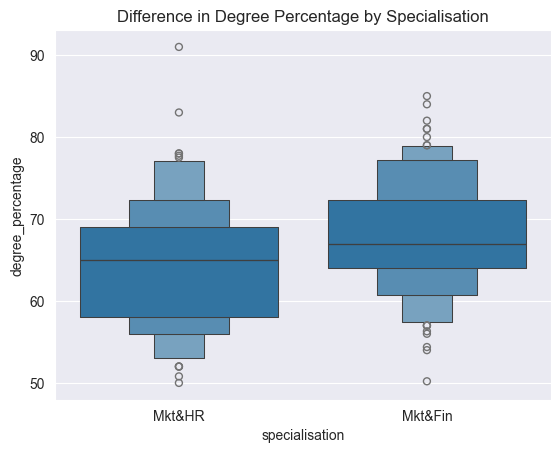

In [70]:
sns.boxenplot(x='specialisation',y='degree_percentage',data=df)
plt.title('Difference in Degree Percentage by Specialisation')
plt.show()

creating dummy column for string data

'categorical features into binary/dummy variable'

In [71]:
df = pd.get_dummies(df,columns=['ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'],drop_first=True)
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,True,True,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,False,True,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,False,False,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,False,False,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,True,True,True,False,False,False,False,False,True
211,58.00,60.00,72.00,74.0,53.62,True,True,False,True,False,True,False,False,True
212,67.00,67.00,73.00,59.0,69.72,True,True,True,False,False,False,True,False,True
213,74.00,66.00,58.00,70.0,60.23,True,True,True,False,False,False,False,True,True


 EDA (Exploratory Data Analysis)

In [72]:
# relationship
corr = df.corr()
corr

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,0.175675,-0.172536,0.607889
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,0.141025,-0.241630,0.491228
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,0.122648,-0.218286,0.479861
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,0.056735,-0.236315,0.127639
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,0.168811,-0.105728,0.076922
ssc_board_Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.040744,-0.051565,0.037297
hsc_board_Others,0.066996,-0.019548,0.067229,0.039108,0.090201,0.605883,1.000000,-0.073522,0.126446,-0.116920,0.086548,0.038357,0.002232,0.016945
hsc_subject_Commerce,-0.101323,0.258093,-0.022724,-0.021732,-0.049415,-0.056671,-0.073522,1.000000,-0.901673,-0.202135,-0.584673,-0.056719,-0.129985,0.024414
hsc_subject_Science,0.189847,-0.226675,0.092006,0.055352,0.048050,0.058505,0.126446,-0.901673,1.000000,0.057432,0.654593,0.033270,0.166639,0.007279
undergrad_degree_Others,-0.066127,-0.131382,-0.180408,0.006907,-0.036055,-0.002758,-0.116920,-0.202135,0.057432,1.000000,-0.142806,0.009507,0.090948,-0.117232


<Axes: >

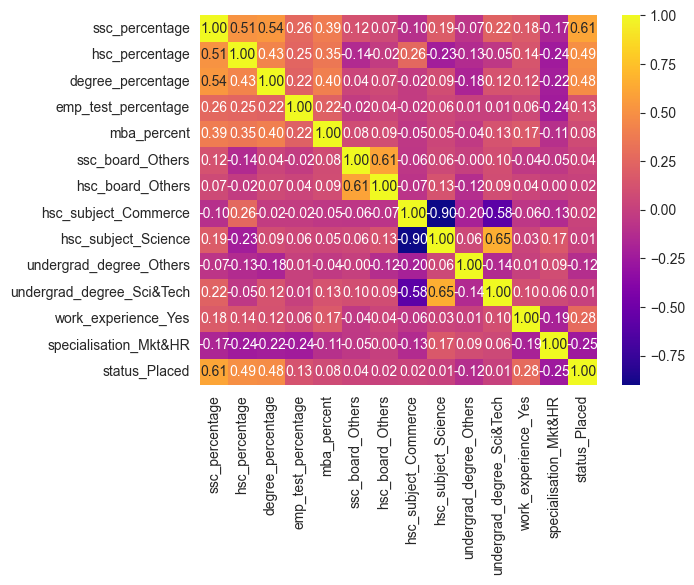

In [73]:
sns.heatmap(corr,cmap="plasma",annot=True,fmt='.2f')

bot train test split

In [74]:

x = df.drop('status_Placed',axis=1)
y = df['status_Placed']

In [75]:
print(x.shape,'\n\n',y.shape)

(215, 13) 

 (215,)


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
print(X_train.shape,'\n\n',X_test.shape)

(172, 13) 

 (43, 13)


In [78]:
X_test

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR
23,77.40,60.00,64.74,92.00,63.62,True,True,False,True,False,True,True,False
166,62.00,62.00,60.00,63.00,52.38,True,True,True,False,False,False,True,True
163,63.00,67.00,64.00,75.00,66.46,True,True,False,True,False,True,False,False
13,77.00,87.00,59.00,68.00,68.63,False,False,True,False,False,False,False,False
64,80.00,73.00,75.00,61.00,58.78,True,True,True,False,False,False,False,False
174,73.24,50.83,64.27,64.00,66.23,True,True,False,True,False,True,True,False
142,85.00,60.00,73.43,60.00,61.29,False,True,False,True,False,True,True,False
189,54.00,77.60,69.20,95.65,66.94,False,True,True,False,False,False,False,False
93,52.00,62.00,54.00,72.00,55.41,False,False,True,False,False,False,False,True
30,64.00,73.50,73.00,52.00,56.70,False,False,True,False,False,False,False,True


Train Logistic Model

In [79]:
y_test

23      True
166     True
163     True
13      True
64      True
174     True
142     True
189    False
93     False
30      True
10      True
89      True
205     True
65     False
98      True
35      True
71      True
143     True
25     False
165    False
202     True
135     True
151     True
44      True
193     True
212     True
155    False
139     True
53      True
24      True
185     True
187     True
113     True
84      True
6      False
28      True
12     False
29     False
197     True
18     False
41     False
5      False
184    False
Name: status_Placed, dtype: bool

In [80]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, precision_score

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8372093023255814
0.8285714285714286


In [82]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier()
sg.fit(X_train, y_train)
y_pred = lg.predict(X_test)



In [83]:
from sklearn.metrics import accuracy_score, precision_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8372093023255814
0.8285714285714286


Prediction System
testing using sample data

In [84]:
input_data = (62.0, 47.0, 50.0, 76.0, 54.96, 0, 0, 1, 0, 0, 0, 0, 1)

np_df = np.asarray(input_data)
print(np_df)
reshaped_df = np_df.reshape(1,-1)
print(reshaped_df)
pred = lg.predict(reshaped_df)
if pred[0] == 1:
    print("Your chances of placement are significantely high.")
else:
    print("Your chances of placement seems low.You must focus on ur skill to strengthen ur chances.")

[62.   47.   50.   76.   54.96  0.    0.    1.    0.    0.    0.    0.
  1.  ]
[[62.   47.   50.   76.   54.96  0.    0.    1.    0.    0.    0.    0.
   1.  ]]
It may be challenging for you to secure a placement this time.
The prediction suggests difficulties in achieving placement.
You might need to strengthen your profile for better placement chances.


importing pickle

In [85]:
import pickle
with open('Placement.pkl', 'wb') as model_file:
    pickle.dump(lg,model_file)